# Goals
Menganalisis faktor-faktor utama penyebab seseorang rentan mengalami Anxiety, sehingga dapat memberikan solusi penyegahan atau mengurangi

# Data Quality Check
- Q1 = Apakah ada data type yang tidak sesuai dengan features?
- Q2 = Adakah duplicate, missing values, atau outlier, dan bagaimana cara mengatasi hal tsb
- Q3 = Apakah terdapat distribusi yang tidak masuk akal

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('deep')

In [105]:
df = pd.read_csv('ANXIETY PREDICTION/anxiety_attack_dataset.csv')
df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


In [110]:
df.shape

(12000, 20)

## Q1 Apakah ada data type yang tidak sesuai dengan features?

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 12000 non-null  int64  
 1   Age                                12000 non-null  int64  
 2   Gender                             12000 non-null  object 
 3   Occupation                         12000 non-null  object 
 4   Sleep Hours                        12000 non-null  float64
 5   Physical Activity (hrs/week)       12000 non-null  float64
 6   Caffeine Intake (mg/day)           12000 non-null  int64  
 7   Alcohol Consumption (drinks/week)  12000 non-null  int64  
 8   Smoking                            12000 non-null  object 
 9   Family History of Anxiety          12000 non-null  object 
 10  Stress Level (1-10)                12000 non-null  int64  
 11  Heart Rate (bpm during attack)     12000 non-null  int

In [139]:
# tidak ada data type yang tidak sesuai dengan features

In [135]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())
    print()

ID int64
1 12000

Age int64
18 64

Gender object
['Female' 'Male' 'Other']

Occupation object
['Other' 'Teacher' 'Doctor' 'Student' 'Unemployed' 'Engineer']

Sleep Hours float64
3.0 10.0

Physical Activity (hrs/week) float64
0.0 10.0

Caffeine Intake (mg/day) int64
0 499

Alcohol Consumption (drinks/week) int64
0 19

Smoking object
['No' 'Yes']

Family History of Anxiety object
['No' 'Yes']

Stress Level (1-10) int64
1 10

Heart Rate (bpm during attack) int64
60 179

Breathing Rate (breaths/min) int64
12 39

Sweating Level (1-5) int64
1 5

Dizziness object
['No' 'Yes']

Medication object
['No' 'Yes']

Therapy Sessions (per month) int64
0 9

Recent Major Life Event object
['Yes' 'No']

Diet Quality (1-10) int64
1 10

Severity of Anxiety Attack (1-10) int64
1 10



In [152]:
# kesimpulan : semua data type sudah sesuai dengan features, dan tidak perlu ada yang diubah atau perbaiki

## Q2 Apakah ada duplicate, missing values, atau outlier?

### Duplicate

In [167]:
df.duplicated().sum()

0

In [ ]:
# kesimpulan = tidak ada data yang duplicated

### Missing Values

In [176]:
df.isna().sum().sort_values(ascending=False)

ID                                   0
Age                                  0
Diet Quality (1-10)                  0
Recent Major Life Event              0
Therapy Sessions (per month)         0
Medication                           0
Dizziness                            0
Sweating Level (1-5)                 0
Breathing Rate (breaths/min)         0
Heart Rate (bpm during attack)       0
Stress Level (1-10)                  0
Family History of Anxiety            0
Smoking                              0
Alcohol Consumption (drinks/week)    0
Caffeine Intake (mg/day)             0
Physical Activity (hrs/week)         0
Sleep Hours                          0
Occupation                           0
Gender                               0
Severity of Anxiety Attack (1-10)    0
dtype: int64

In [182]:
# kesimpulan = tidak ada missing values

### Outlier

In [187]:
df.columns

Index(['ID', 'Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Sweating Level (1-5)', 'Dizziness', 'Medication',
       'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)', 'Severity of Anxiety Attack (1-10)'],
      dtype='object')

In [191]:
# karena outlier itu hanya terdapat pada data yang bertipe int dan float, maka kita akan melakukan pengecekan pada features yang memiliki data type tersebut

In [235]:
df_to_plot = df.select_dtypes(include=['float', 'int'])
df_to_plot.drop(columns=['ID', 'Stress Level (1-10)', 'Sweating Level (1-5)', 'Diet Quality (1-10)', 
                         'Severity of Anxiety Attack (1-10)'], inplace=True)

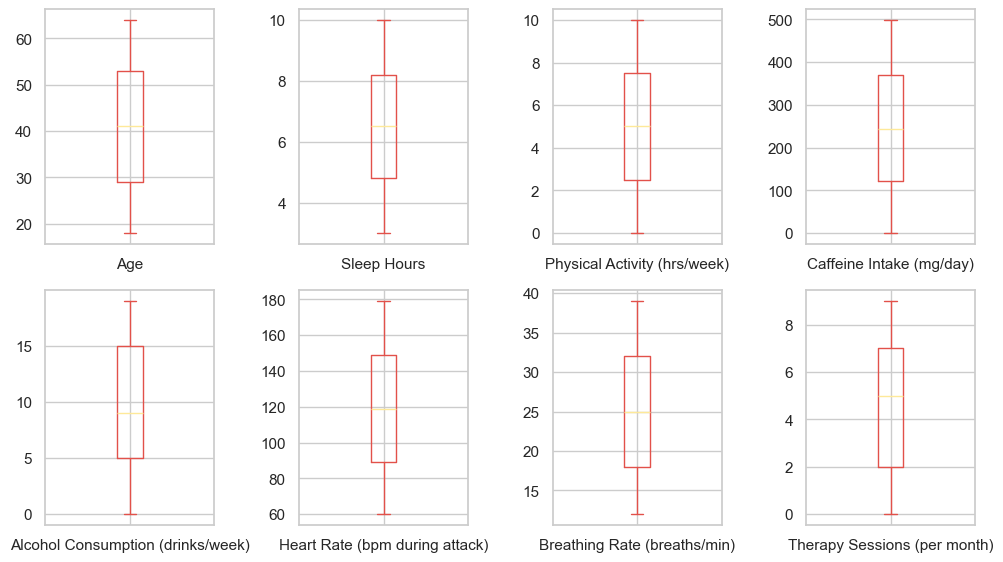

In [269]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

In [273]:
# jika dilihat dari box plot diatas, tidak terlihat ada outlier

## Q3 Apakah ada distribusi yang tidak masuk akal?

In [291]:
numeric = df_to_plot.columns
numeric

Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)',
       'Therapy Sessions (per month)'],
      dtype='object')

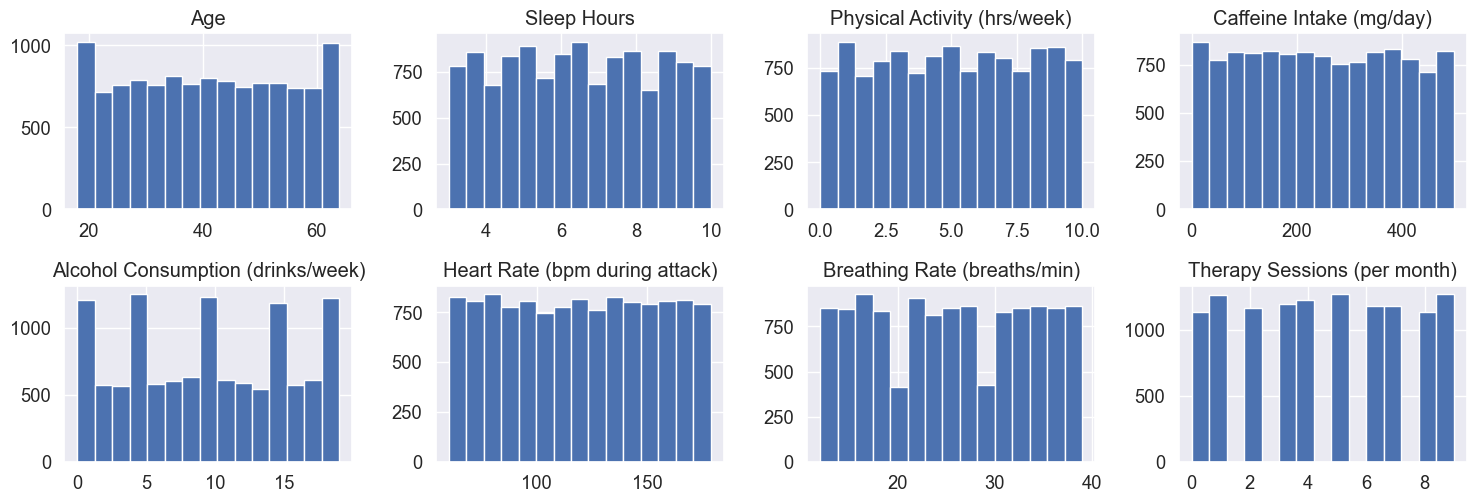

In [596]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=15, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

In [320]:
# semua data yang terdistribusi masuk akal

# Data Insight

In [324]:
df.head()

,ID,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Severity of Anxiety Attack (1-10)
0,1,56,Female,Other,9.6,8.3,175,6,No,No,4,145,33,3,No,No,4,Yes,9,10
1,2,46,Male,Teacher,6.4,7.3,97,6,No,No,3,143,18,5,Yes,No,0,No,9,8
2,3,32,Female,Doctor,6.9,1.0,467,14,No,No,2,60,34,1,No,No,7,Yes,10,5
3,4,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,94,19,1,No,Yes,4,Yes,5,8
4,5,25,Male,Student,9.2,2.5,364,2,No,Yes,7,152,15,4,No,Yes,0,No,1,1


## Age

In [350]:
# sns.histplot(data=df, x='Age', hue='Severity of Anxiety Attack(1-10)', hue_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], multiple='stack', kde=True)
# seringkali orang lupa dalam menggunakan coding diatas, variabel hue harus menggunakan data type berupa category atau object
# mungkin bisa menggunakan data type int64, namun data dalam datatype tersebut boleh hanya memiliki dua hasil.
# jadi harus merubah data type Severity of Anxiety Attack yang tadinya int64 menjadi category

<Axes: xlabel='Age', ylabel='Count'>

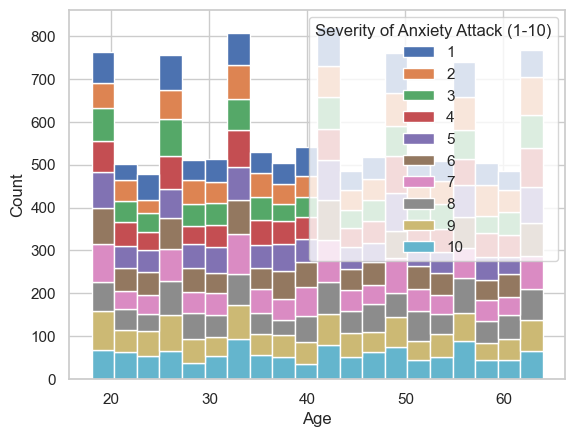

In [422]:
# Mengubah tipe data menjadi kategori
df['Severity of Anxiety Attack (1-10)'] = df['Severity of Anxiety Attack (1-10)'].astype('category')

sns.histplot(data=df, x='Age', hue='Severity of Anxiety Attack (1-10)', multiple='stack', kde=True, line_kws={'lw':0}, alpha=1, bins=20)

In [ ]:
# jika anda tidak bisa membaca histogram diatas, anda juga bisa menggunakan FacetGrid untuk membuat beberapa plot secara bersamaan

<Figure size 1500x1000 with 0 Axes>

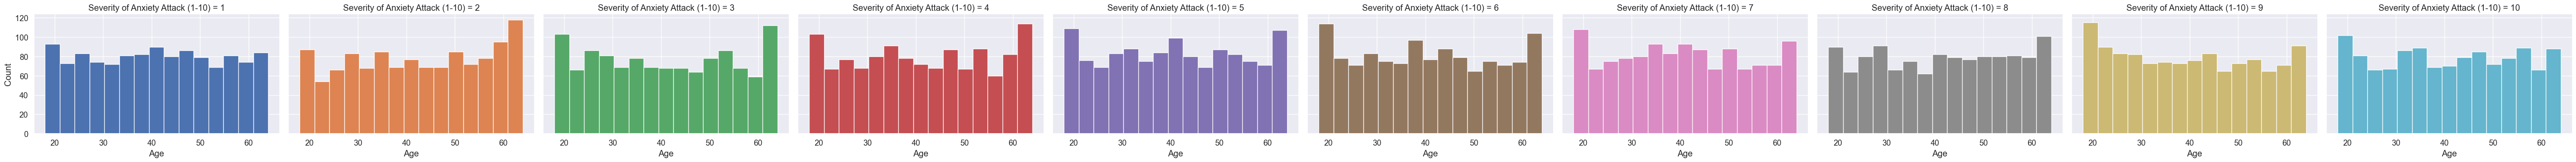

In [562]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="Severity of Anxiety Attack (1-10)", hue="Severity of Anxiety Attack (1-10)", height=4, aspect=1.5)
g.map(sns.histplot, "Age", kde=True, line_kws={'lw':0}, alpha=1, bins=15)

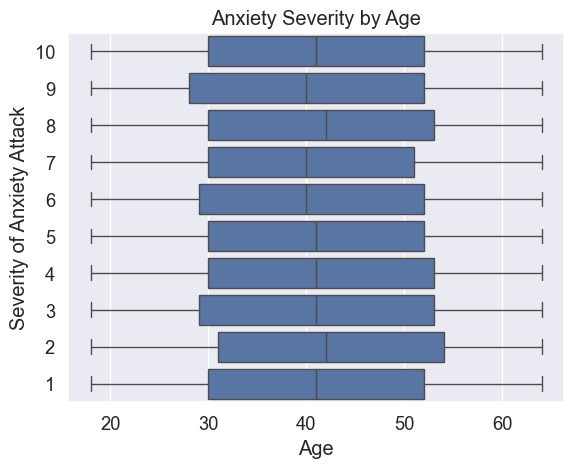

In [588]:
ax = sns.boxplot(x='Age', y='Severity of Anxiety Attack (1-10)', data=df)
ax.invert_yaxis()
plt.title('Anxiety Severity by Age')
plt.xlabel('Age')
plt.ylabel('Severity of Anxiety Attack')
plt.show()

## Gender

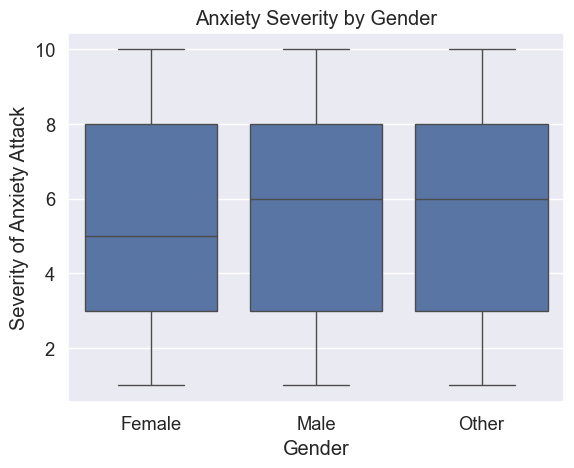

In [592]:
ax = sns.boxplot(x='Gender', y='Severity of Anxiety Attack (1-10)', data=df)
ax.invert_yaxis()
plt.title('Anxiety Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Severity of Anxiety Attack')
plt.show()

## Occupation

<Figure size 1500x1000 with 0 Axes>

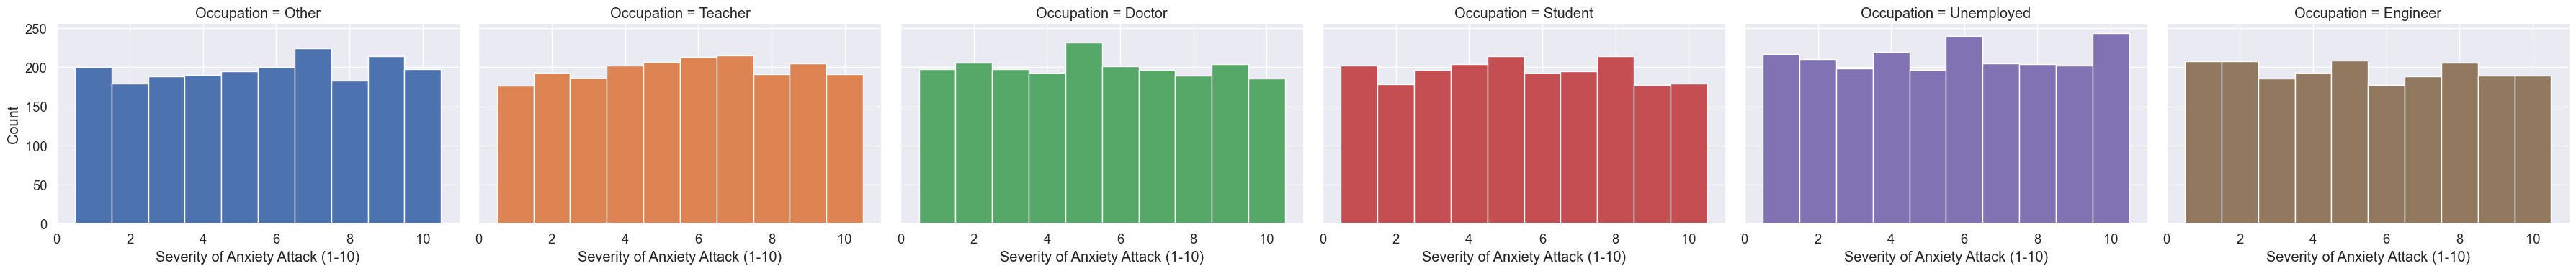

In [638]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="Occupation", hue="Occupation", height=4, aspect=1.5)
g.map(sns.histplot, "Severity of Anxiety Attack (1-10)", kde=True, line_kws={'lw':0}, alpha=1, bins=15)

## Sleep Hours

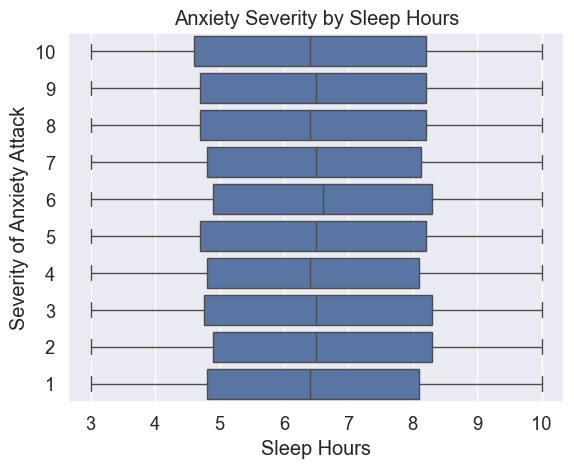

In [599]:
ax = sns.boxplot(x='Sleep Hours', y='Severity of Anxiety Attack (1-10)', data=df)
ax.invert_yaxis()
plt.title('Anxiety Severity by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Severity of Anxiety Attack')
plt.show()

## Physical Activity

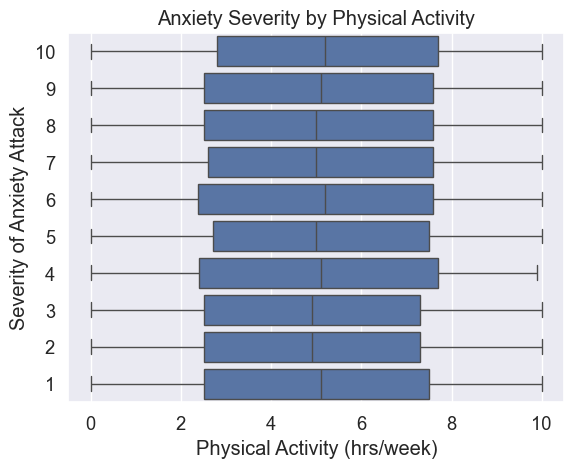

In [612]:
ax = sns.boxplot(x='Physical Activity (hrs/week)', y='Severity of Anxiety Attack (1-10)', data=df)
ax.invert_yaxis()
plt.title('Anxiety Severity by Physical Activity')
plt.xlabel('Physical Activity (hrs/week)')
plt.ylabel('Severity of Anxiety Attack')
plt.show()

## Caffein Intake

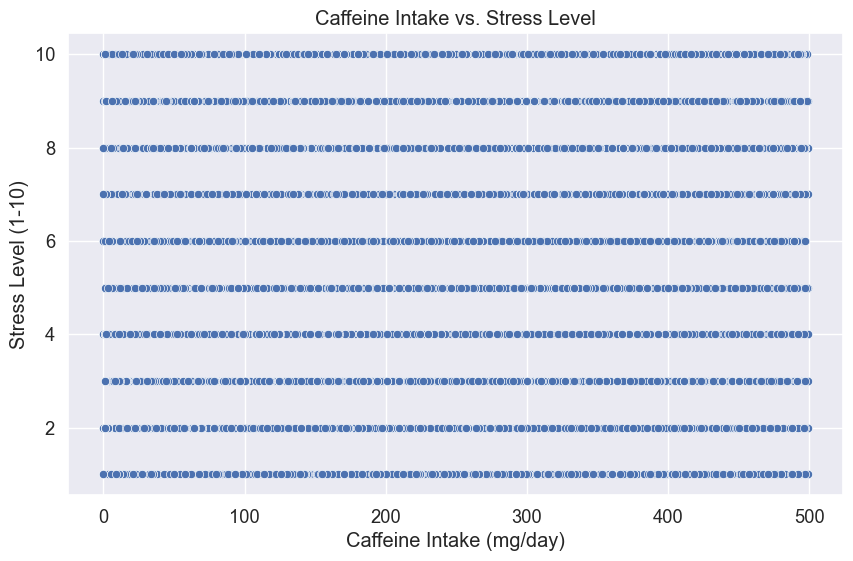

In [609]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Caffeine Intake (mg/day)', y='Stress Level (1-10)', data=df)
plt.title('Caffeine Intake vs. Stress Level')
plt.xlabel('Caffeine Intake (mg/day)')
plt.ylabel('Stress Level (1-10)')
plt.show()

## Alcohol Consumption

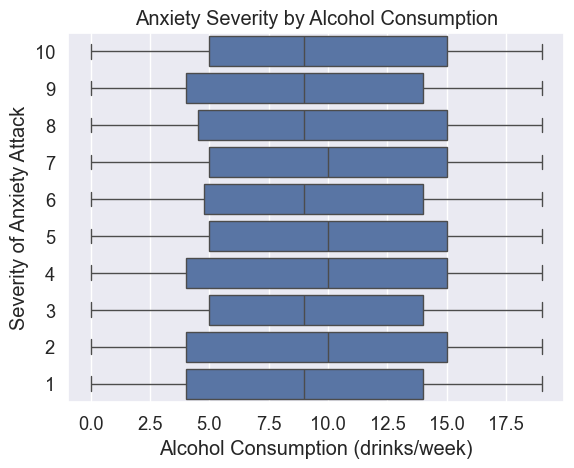

In [614]:
ax = sns.boxplot(x='Alcohol Consumption (drinks/week)', y='Severity of Anxiety Attack (1-10)', data=df)
ax.invert_yaxis()
plt.title('Anxiety Severity by Alcohol Consumption')
plt.xlabel('Alcohol Consumption (drinks/week)')
plt.ylabel('Severity of Anxiety Attack')
plt.show()

## Smoking 

<Figure size 1500x1000 with 0 Axes>

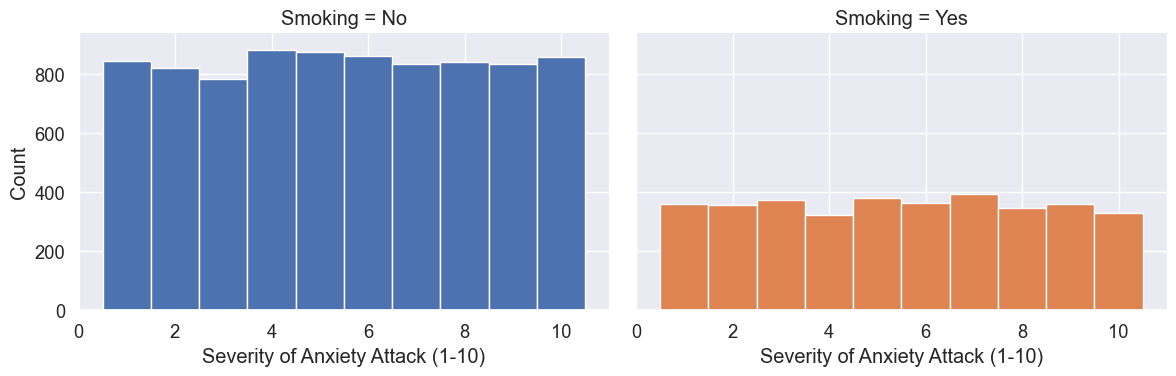

In [622]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="Smoking", hue="Smoking", height=4, aspect=1.5)
g.map(sns.histplot, "Severity of Anxiety Attack (1-10)", kde=True, line_kws={'lw':0}, alpha=1, bins=15)

## Family History of Anxiety

<Figure size 1500x1000 with 0 Axes>

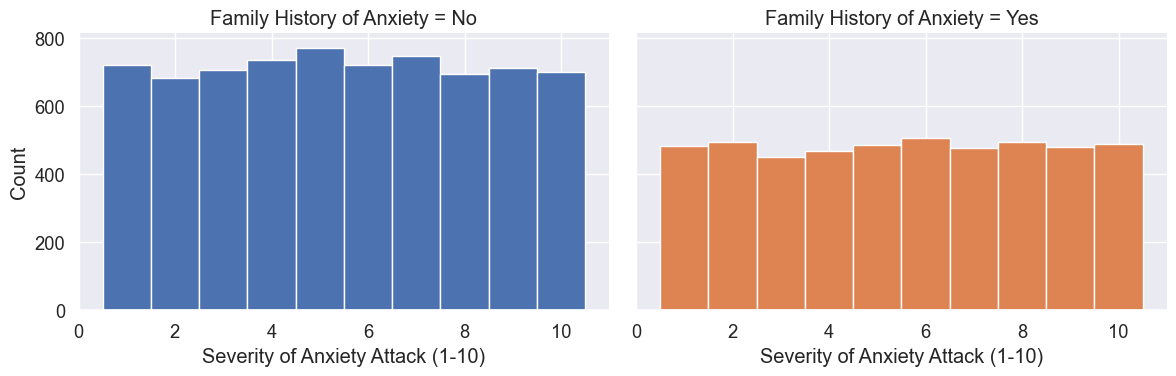

In [620]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="Family History of Anxiety", hue="Family History of Anxiety", height=4, aspect=1.5)
g.map(sns.histplot, "Severity of Anxiety Attack (1-10)", kde=True, line_kws={'lw':0}, alpha=1, bins=15)

## Stress Level

<Figure size 1500x1000 with 0 Axes>

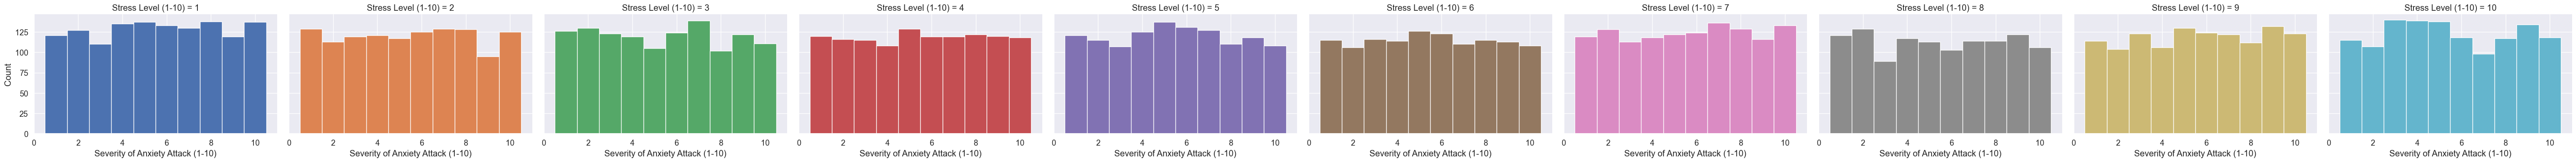

In [630]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="Stress Level (1-10)", hue="Stress Level (1-10)", height=4, aspect=1.5)
g.map(sns.histplot, "Severity of Anxiety Attack (1-10)", kde=True, line_kws={'lw':0}, alpha=1, bins=15)

## Dizziness

<Figure size 1500x1000 with 0 Axes>

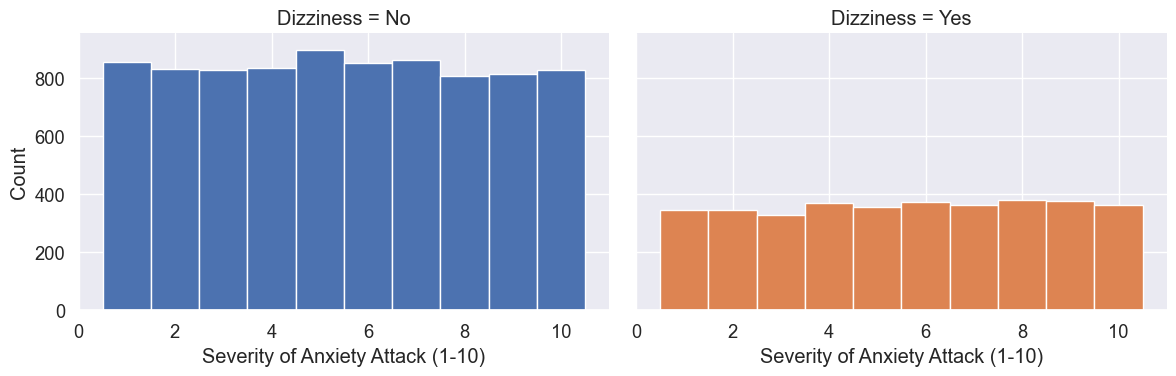

In [634]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="Dizziness", hue="Dizziness", height=4, aspect=1.5)
g.map(sns.histplot, "Severity of Anxiety Attack (1-10)", kde=True, line_kws={'lw':0}, alpha=1, bins=15)

## Medication

<Figure size 1500x1000 with 0 Axes>

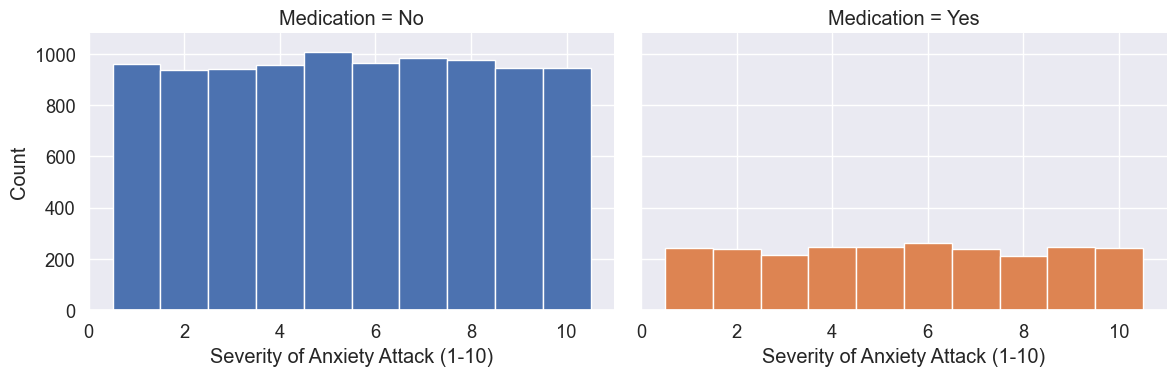

In [636]:
plt.figure(figsize=(15, 10))
g = sns.FacetGrid(df, col="Medication", hue="Medication", height=4, aspect=1.5)
g.map(sns.histplot, "Severity of Anxiety Attack (1-10)", kde=True, line_kws={'lw':0}, alpha=1, bins=15)

# Modeling

## Removing Unused Features

In [655]:
df = df.drop(columns=['Heart Rate (bpm during attack)', 'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Therapy Sessions (per month)', 'Recent Major Life Event', 'Diet Quality (1-10)', 'Age_Range'])

In [657]:
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Dizziness,Medication,Severity of Anxiety Attack (1-10)
0,56,Female,Other,9.6,8.3,175,6,No,No,4,No,No,10
1,46,Male,Teacher,6.4,7.3,97,6,No,No,3,Yes,No,8
2,32,Female,Doctor,6.9,1.0,467,14,No,No,2,No,No,5
3,60,Male,Doctor,9.2,3.7,471,16,No,Yes,6,No,Yes,8
4,25,Male,Student,9.2,2.5,364,2,No,Yes,7,No,Yes,1


## Label Encoder
Label Encoder adalah teknik yang digunakan dalam pemrosesan data untuk mengubah data kategorikal menjadi representasi numerik. Ini sangat berguna dalam algoritma machine learning yang membutuhkan input numerik.

In [662]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Gender
0 -> Female
1 -> Male
2 -> Other

Column: Occupation
0 -> Doctor
1 -> Engineer
2 -> Other
3 -> Student
4 -> Teacher
5 -> Unemployed

Column: Smoking
0 -> No
1 -> Yes

Column: Family History of Anxiety
0 -> No
1 -> Yes

Column: Dizziness
0 -> No
1 -> Yes

Column: Medication
0 -> No
1 -> Yes



# Machine Learning

In [665]:
from sklearn.model_selection import train_test_split

X = df.drop('Severity of Anxiety Attack (1-10)',axis = 1)
y = df['Severity of Anxiety Attack (1-10)']

In [667]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(9600, 12) (2400, 12)


## K Neighboor Classifier
K-Nearest Neighbors (KNN) adalah salah satu algoritma klasifikasi yang paling sederhana dan intuitif dalam machine learning. Algoritma ini bekerja dengan prinsip bahwa suatu data baru akan diklasifikasikan berdasarkan kelas dari k data terdekatnya.

In [672]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [674]:
y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.09916666666666667

## Logistic Regression
Regresi Logistik adalah salah satu algoritma yang paling umum digunakan dalam machine learning untuk masalah klasifikasi. Algoritma ini digunakan untuk memprediksi kemungkinan suatu kejadian atau kelas tertentu. Meskipun namanya mengandung kata "regresi", regresi logistik sebenarnya adalah algoritma klasifikasi, bukan regresi.

In [679]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X, y)

In [681]:
y_pred = loj_model.predict(X)
lr_accuracy = accuracy_score(y, y_pred)
lr_accuracy

0.12241666666666666

## Random Forest
Random Forest adalah salah satu algoritma machine learning yang paling populer dan serbaguna. Algoritma ini merupakan gabungan (ensemble) dari banyak pohon keputusan, di mana setiap pohon "memutuskan" kelas atau nilai suatu data berdasarkan sejumlah aturan. Dengan menggabungkan keputusan dari banyak pohon, Random Forest mampu menghasilkan prediksi yang lebih akurat dan stabil dibandingkan dengan menggunakan satu pohon keputusan saja.

In [686]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier().fit(X_train, y_train)

In [688]:
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

0.09916666666666667

## Result

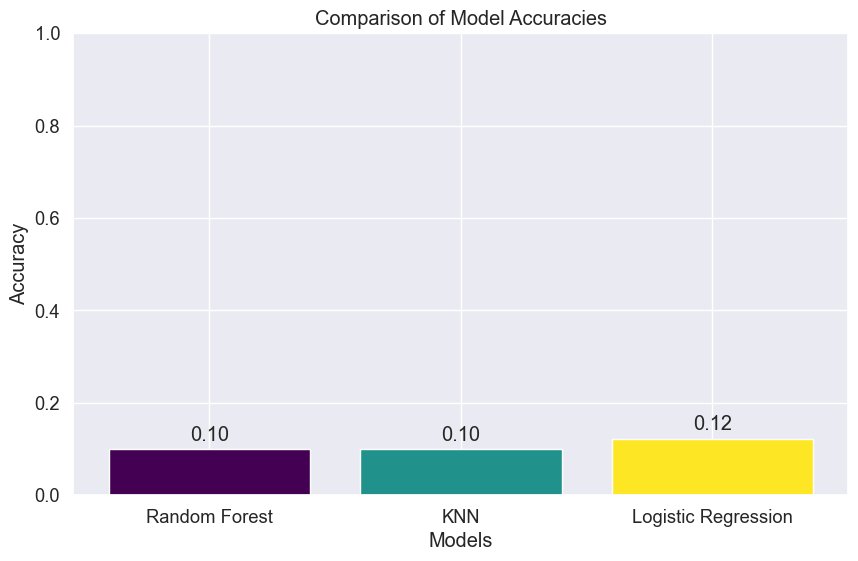

In [691]:
models = ['Random Forest', 'KNN', 'Logistic Regression']
accuracies = [rf_accuracy, knn_accuracy, lr_accuracy]

colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)

for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()